In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("taxis")
df.head()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [2]:
df.isnull().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [4]:

num_cols = df.select_dtypes(include=['float64', 'int64']).columns



In [5]:

cat_cols = df.select_dtypes(include=['object', 'category']).columns



In [6]:

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with missing critical values
df.dropna(subset=['pickup', 'fare', 'distance'], inplace=True)


/tmp/ipython-input-2938488050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2938488050.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<Figure size 640x480 with 0 Axes>

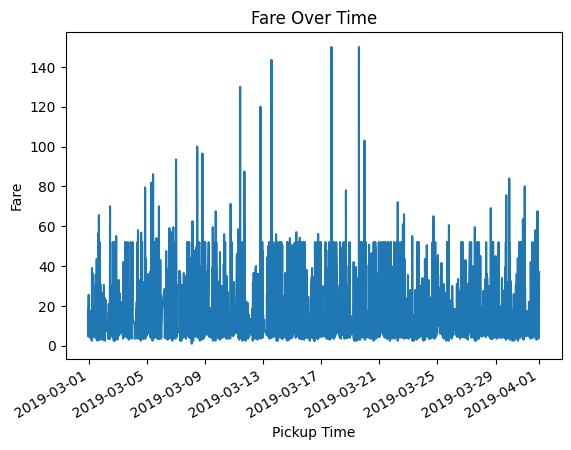

In [7]:
df['pickup'] = pd.to_datetime(df['pickup'])

plt.figure()
df.sort_values('pickup').plot(x='pickup', y='fare', legend=False)
plt.title("Fare Over Time")
plt.xlabel("Pickup Time")
plt.ylabel("Fare")
plt.show()

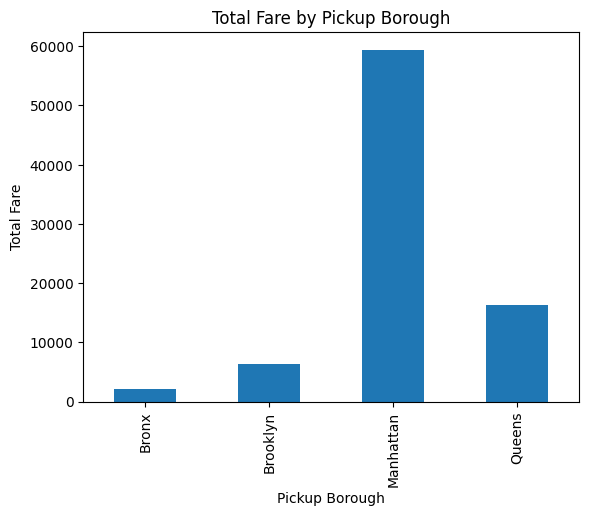

In [8]:
fare_by_borough = df.groupby('pickup_borough')['fare'].sum()

fare_by_borough.plot(kind='bar')
plt.title("Total Fare by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare")
plt.show()

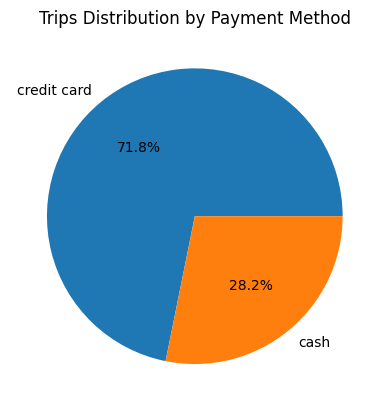

In [9]:
payment_counts = df['payment'].value_counts()

payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Trips Distribution by Payment Method")
plt.ylabel("")
plt.show()

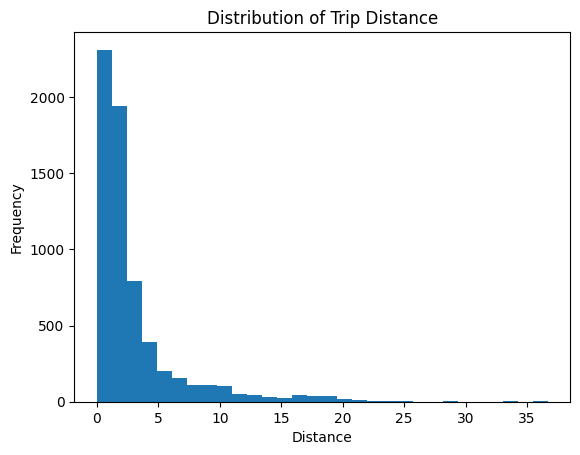

In [10]:
plt.figure()
plt.hist(df['distance'], bins=30)
plt.title("Distribution of Trip Distance")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

<Figure size 640x480 with 0 Axes>

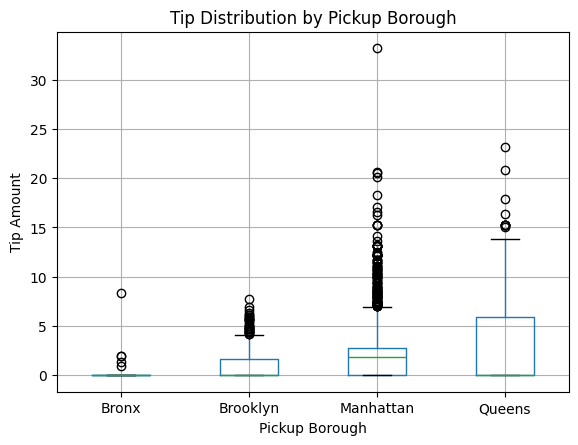

In [11]:
plt.figure()
df.boxplot(column='tip', by='pickup_borough')
plt.title("Tip Distribution by Pickup Borough")
plt.suptitle("")
plt.xlabel("Pickup Borough")
plt.ylabel("Tip Amount")
plt.show()

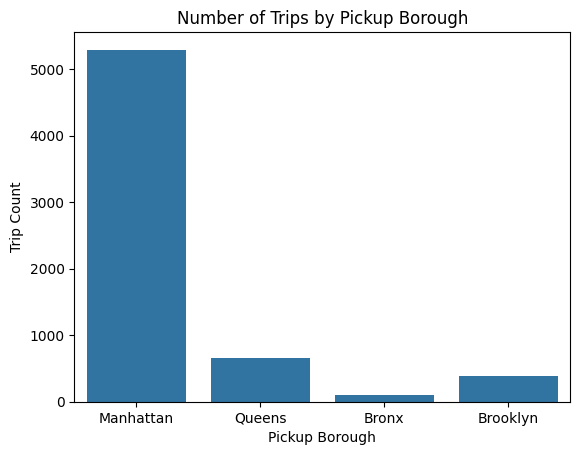

In [12]:
plt.figure()
sns.countplot(x='pickup_borough', data=df)
plt.title("Number of Trips by Pickup Borough")
plt.xlabel("Pickup Borough")
plt.ylabel("Trip Count")
plt.show()

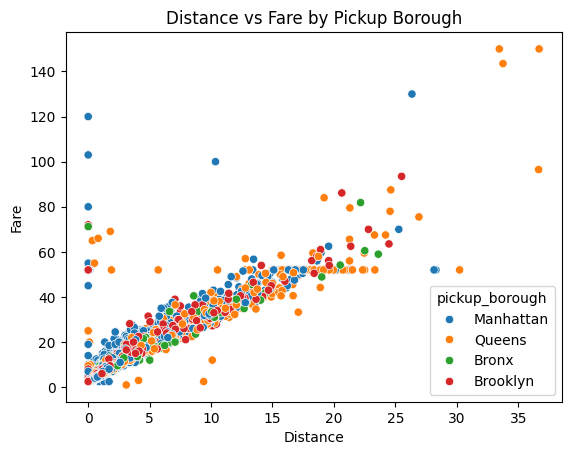

In [13]:
plt.figure()
sns.scatterplot(x='distance', y='fare', hue='pickup_borough', data=df)
plt.title("Distance vs Fare by Pickup Borough")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.show()

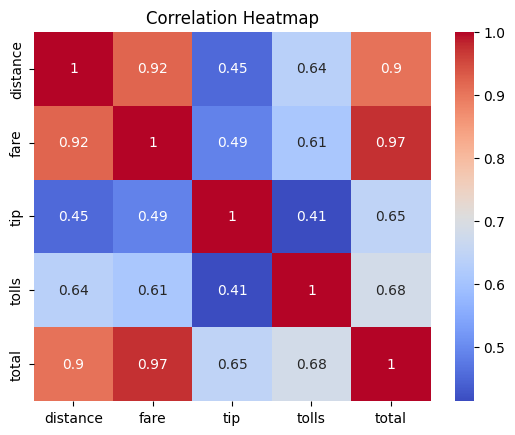

In [14]:
corr = df[['distance', 'fare', 'tip', 'tolls', 'total']].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


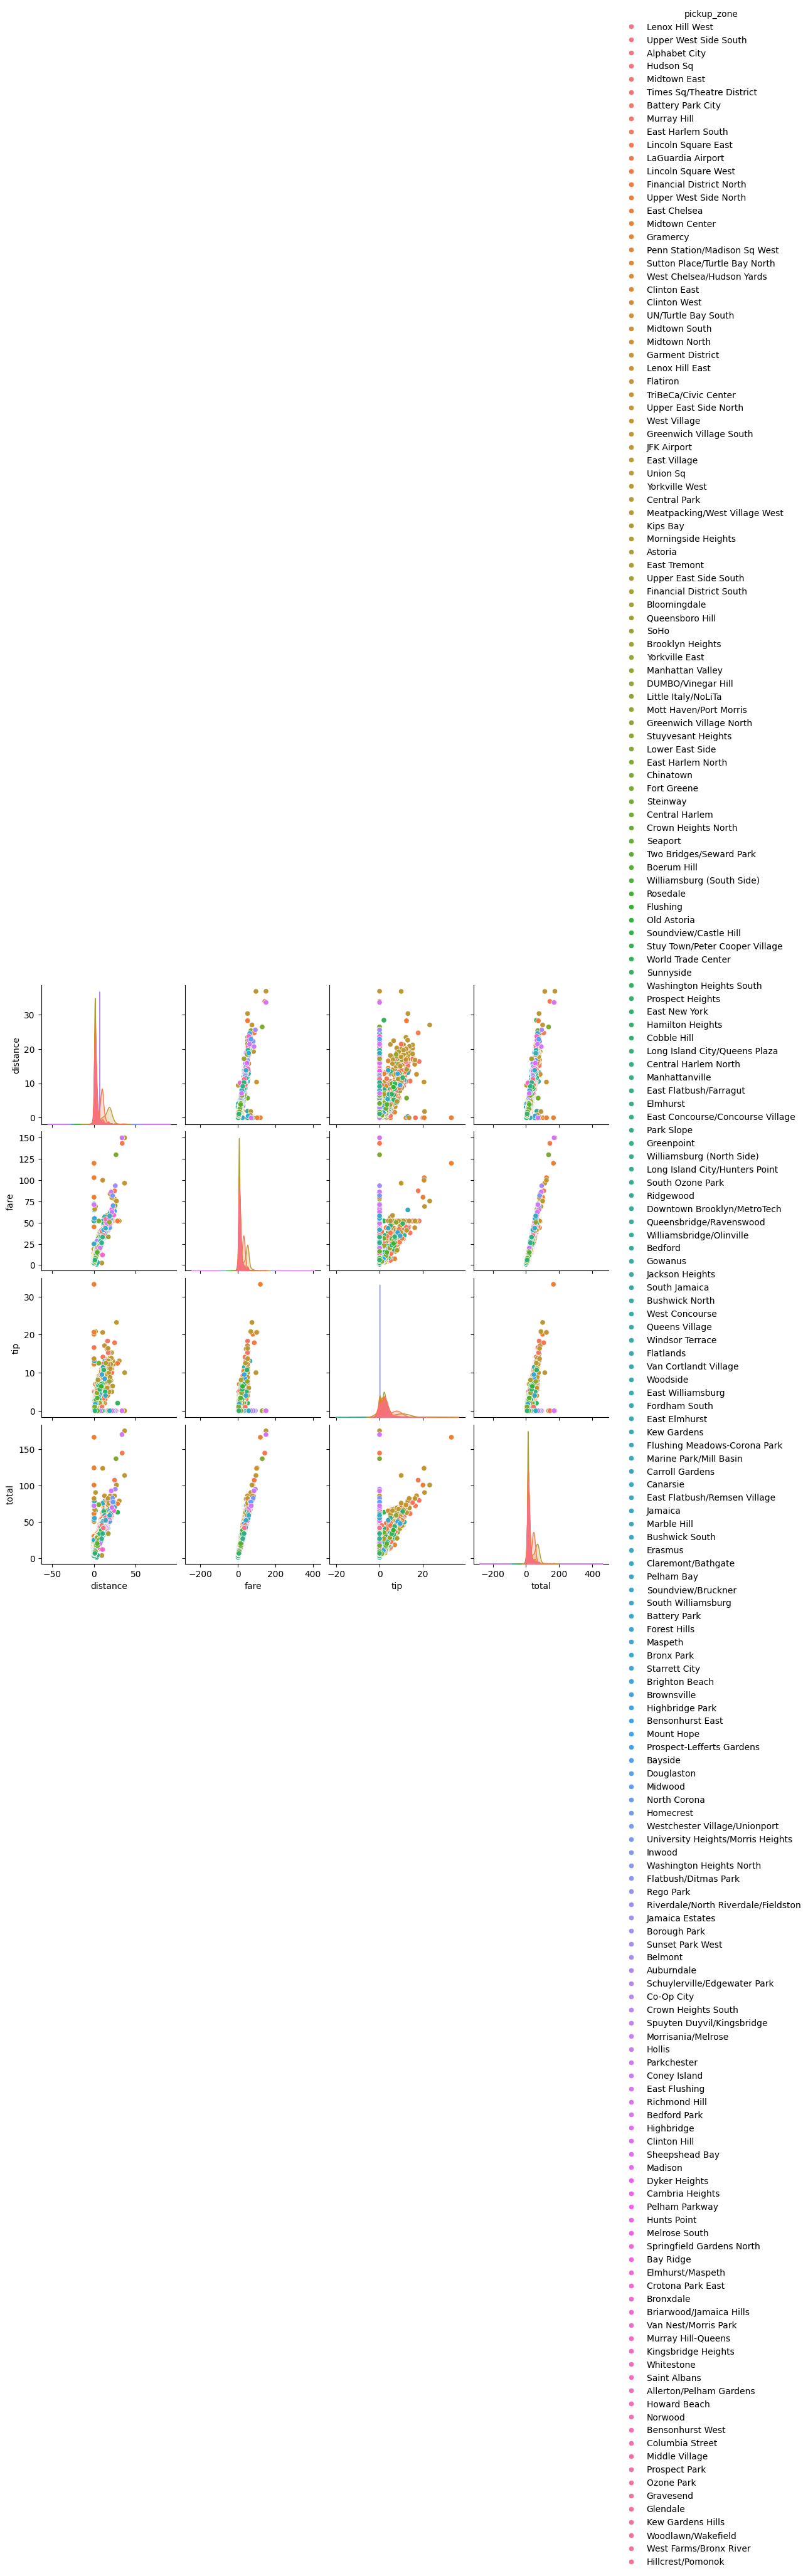

In [15]:
sns.pairplot(
    df[['distance', 'fare', 'tip', 'total', 'pickup_zone']],
    hue='pickup_zone'
)
plt.show()


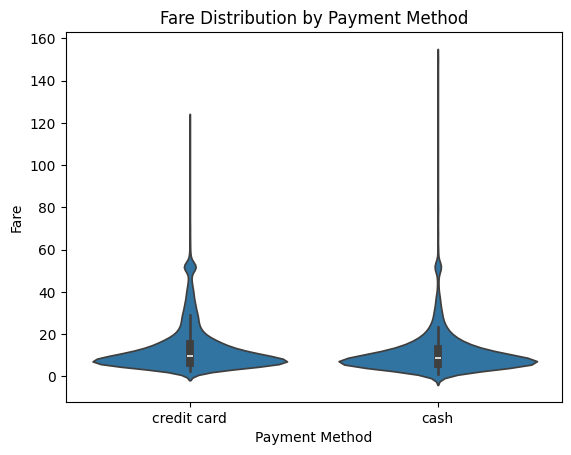

In [16]:
plt.figure()
sns.violinplot(x='payment', y='fare', data=df)
plt.title("Fare Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Fare")
plt.show()
